In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Olympics (1896-2024).csv')

In [4]:
df

,Year,Rank,NOC,Gold,Silver,Bronze,Total
0,2024,1,United States,40,44,42,126
1,2024,2,China,40,27,24,91
2,2024,3,Japan,20,12,13,45
3,2024,4,Australia,18,19,16,53
4,2024,5,France,16,26,22,64
...,...,...,...,...,...,...,...
1431,1896,7,Austria,2,1,2,5
1432,1896,8,Australia,2,0,0,2
1433,1896,9,Denmark,1,2,3,6
1434,1896,10,Switzerland,1,2,0,3


In [5]:
df.describe()

,Year,Gold,Silver,Bronze,Total
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,1981.899721,4.053621,4.030641,4.392061,12.476323
std,34.119053,8.411742,7.115310,6.847175,21.641717
min,1896.000000,0.000000,0.000000,0.000000,1.000000
25%,1960.000000,0.000000,0.000000,1.000000,2.000000
50%,1992.000000,1.000000,2.000000,2.000000,5.000000
75%,2008.000000,4.000000,4.000000,5.000000,13.000000
max,2024.000000,83.000000,79.000000,78.000000,234.000000


In [6]:
df.columns

Index(['Year', 'Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

In [7]:
df.isnull().sum()

Year      0
Rank      0
NOC       0
Gold      0
Silver    0
Bronze    0
Total     0
dtype: int64

In [8]:
print("Unique Years:", df['Year'].nunique())

Unique Years: 30


In [9]:
print("Unique NOCs:", df['NOC'].nunique())

Unique NOCs: 217


In [10]:
top_countries = df.groupby("NOC")["Total"].sum().sort_values(ascending=False).head(50)
print(top_countries)

NOC
United States             2540
Soviet Union               907
Great Britain              808
France                     786
China                      727
Germany                    668
Italy                      593
Australia                  571
Japan                      508
Hungary                    486
Sweden                     463
Russia                     422
East Germany               409
Netherlands                345
South Korea                320
Canada                     320
Romania                    307
Poland                     284
Finland                    275
Cuba                       244
United States (USA)        228
Bulgaria                   224
Switzerland                215
West Germany               204
Denmark                    199
Spain                      185
Brazil                     168
Norway                     162
Belgium                    157
New Zealand                153
Ukraine                    151
Great Britain (GBR)[a]     146
Czec

In [11]:
latest_year = df["Year"].max()
latest_data = df[df["Year"] == latest_year].sort_values("Rank").head(10)

In [12]:
latest_data

,Year,Rank,NOC,Gold,Silver,Bronze,Total
0,2024,1,United States,40,44,42,126
9,2024,10,Germany,12,13,8,33
10,2024,11,New Zealand,10,7,3,20
11,2024,12,Canada,9,7,11,27
12,2024,13,Uzbekistan,8,2,3,13
13,2024,14,Hungary,6,7,6,19
14,2024,15,Spain,5,4,9,18
15,2024,16,Sweden,4,4,3,11
16,2024,17,Kenya,4,2,5,11
17,2024,18,Norway,4,1,3,8


In [13]:
latest_year

2024

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_2408\2086691622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_data, x="NOC", y="Total", palette="viridis")


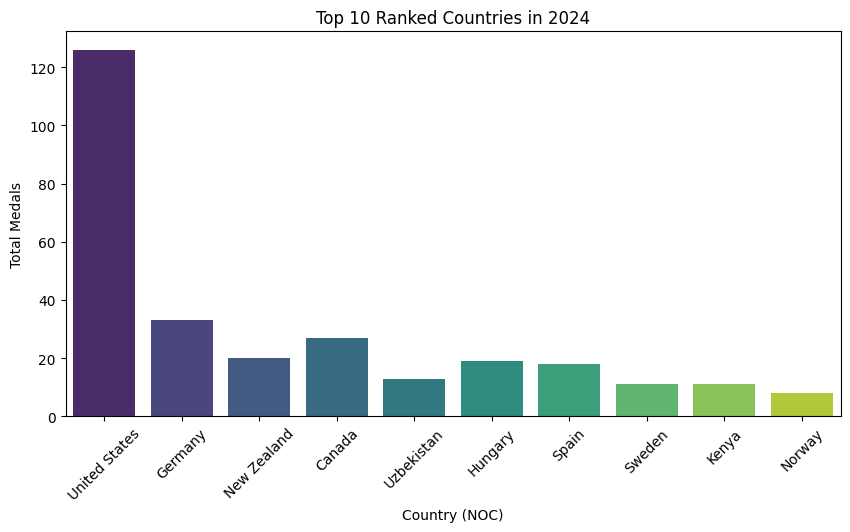

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(data=latest_data, x="NOC", y="Total", palette="viridis")
plt.title(f"Top 10 Ranked Countries in {latest_year}")
plt.xlabel("Country (NOC)")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.show()

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_2408\3934721681.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="Total", estimator="sum", ci=None, marker='o', color='blue')


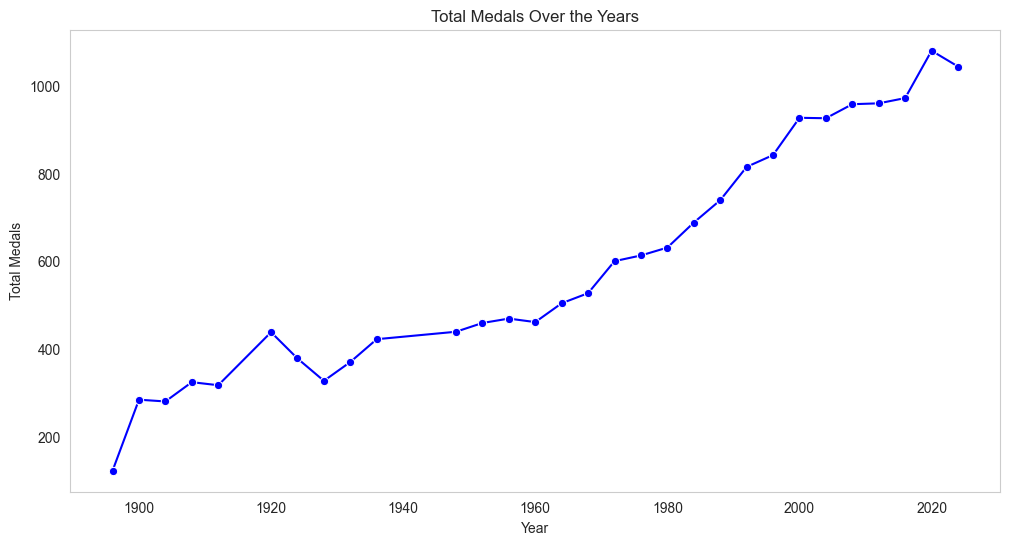

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Total", estimator="sum", ci=None, marker='o', color='blue')
plt.title("Total Medals Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid()
plt.show()

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_2408\3380022085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


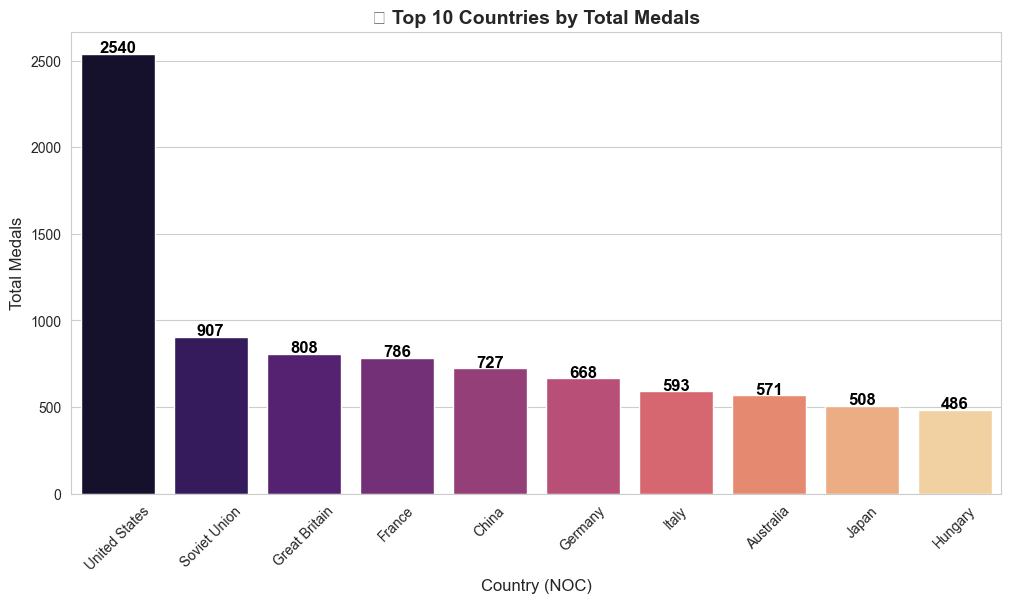

In [16]:
# Aggregate total medals by NOC and get the top 10 countries
top_countries = df.groupby("NOC")["Total"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")

# Add labels on top of bars
for i, value in enumerate(top_countries.values):
    plt.text(i, value + 5, str(value), ha="center", fontsize=12, fontweight="bold", color="black")

# Titles and labels
plt.title("🏅 Top 10 Countries by Total Medals", fontsize=14, fontweight="bold")
plt.xlabel("Country (NOC)", fontsize=12)
plt.ylabel("Total Medals", fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()

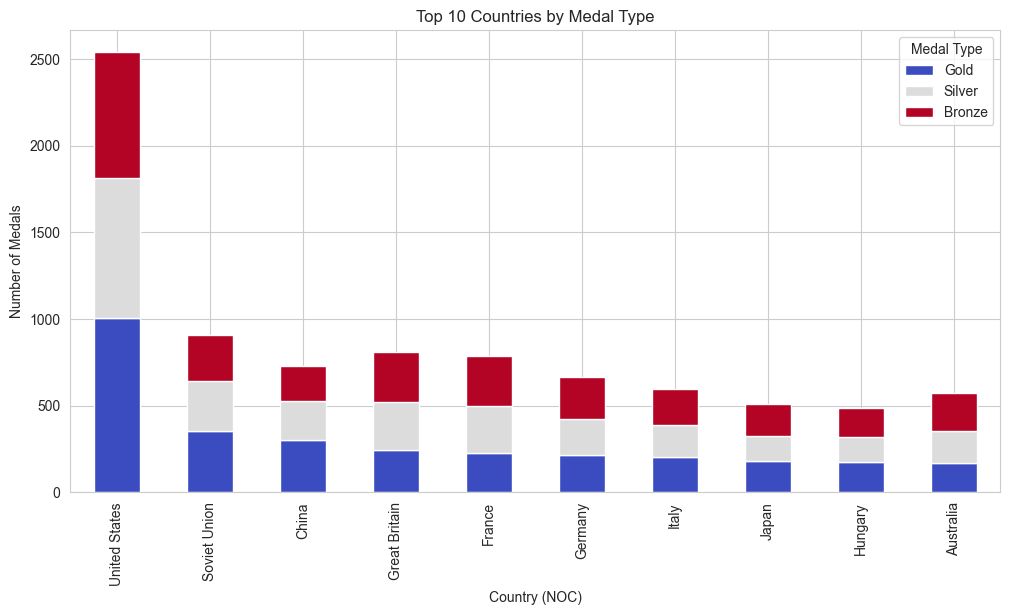

In [17]:
medal_distribution = df.groupby("NOC")[["Gold", "Silver", "Bronze"]].sum().sort_values("Gold", ascending=False).head(10)
medal_distribution.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Top 10 Countries by Medal Type")
plt.xlabel("Country (NOC)")
plt.ylabel("Number of Medals")
plt.legend(title="Medal Type")
plt.show()

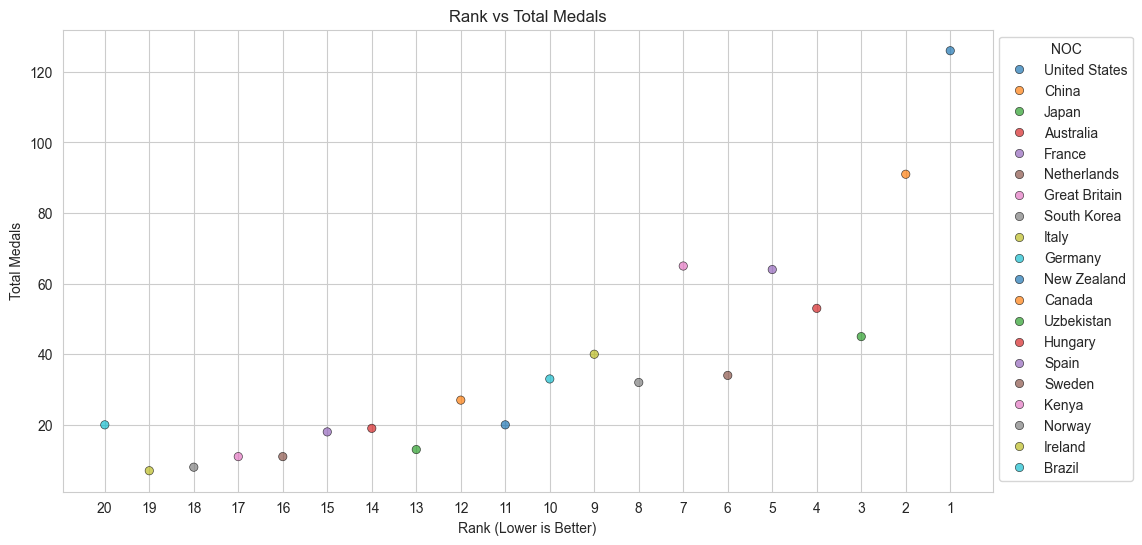

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df.head(20), x="Rank", y="Total", hue="NOC", palette="tab10", alpha=0.7, edgecolor="black")
plt.gca().invert_xaxis()  # Lower rank is better
plt.title("Rank vs Total Medals")
plt.xlabel("Rank (Lower is Better)")
plt.ylabel("Total Medals")
plt.legend(title="NOC", bbox_to_anchor=(1, 1))
plt.show()

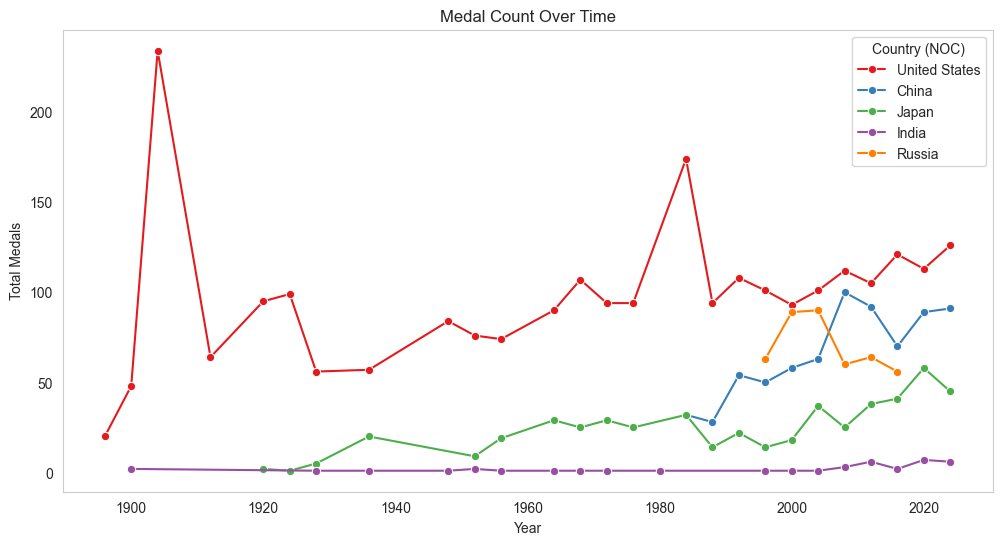

In [19]:
countries = ["United States", "China", "Russia","India","Japan"]
df_filtered = df[df["NOC"].isin(countries)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="Year", y="Total", hue="NOC", marker='o', palette="Set1")
plt.title("Medal Count Over Time")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid()
plt.legend(title="Country (NOC)")
plt.show()

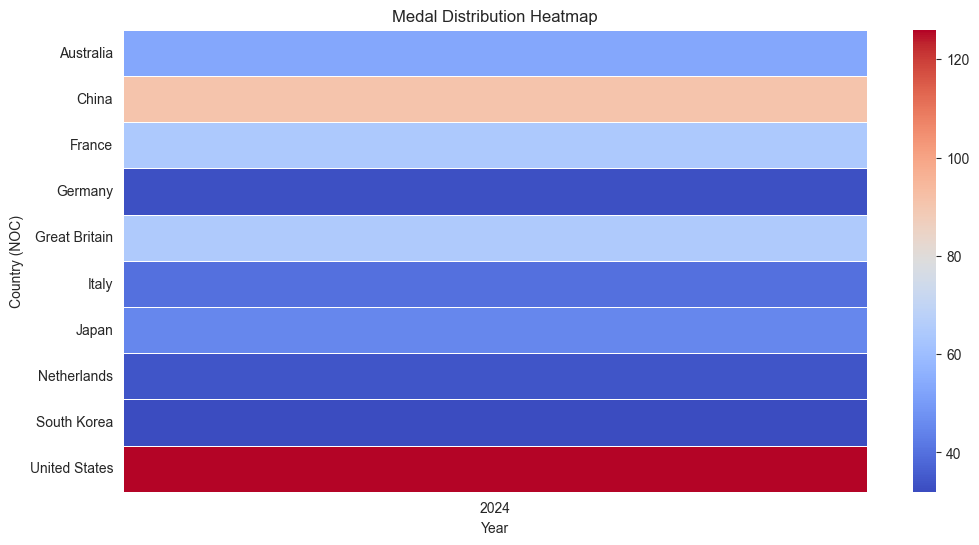

In [20]:
plt.figure(figsize=(12, 6))
medal_pivot = df.head(10).pivot_table(index="NOC", columns="Year", values="Total", aggfunc="sum").fillna(0)
sns.heatmap(medal_pivot, cmap="coolwarm", linewidths=0.5)
plt.title("Medal Distribution Heatmap")
plt.xlabel("Year")
plt.ylabel("Country (NOC)")
plt.show()

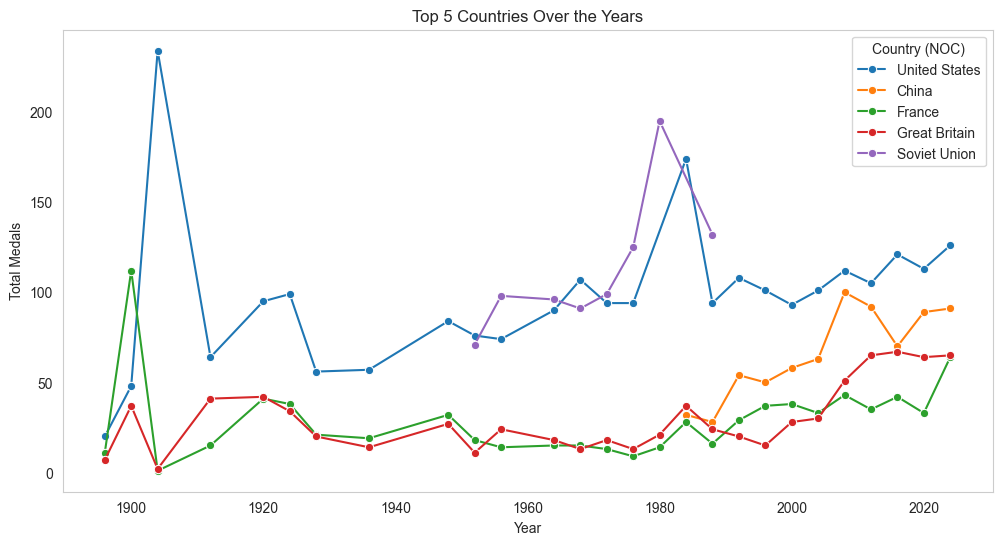

In [21]:
top_nations = df.groupby("NOC")["Total"].sum().nlargest(5).index
df_top_nations = df[df["NOC"].isin(top_nations)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_nations, x="Year", y="Total", hue="NOC", marker='o', palette="tab10")
plt.title("Top 5 Countries Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid()
plt.legend(title="Country (NOC)")
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
country = "United States"  # Change this to any country (NOC)
df_country = df[df["NOC"] == country][["Year", "Total"]].groupby("Year").sum().reset_index()

In [24]:
X = df_country[["Year"]]
y = df_country["Total"]

In [25]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [26]:
future_years = np.array([2028, 2032, 2036]).reshape(-1, 1)
future_predictions = model.predict(future_years)

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
predictions_df = pd.DataFrame({"Year": [2028, 2032, 2036], "Predicted_Medals": future_predictions.astype(int)})
print(predictions_df)


   Year  Predicted_Medals
0  2028               116
1  2032               117
2  2036               118


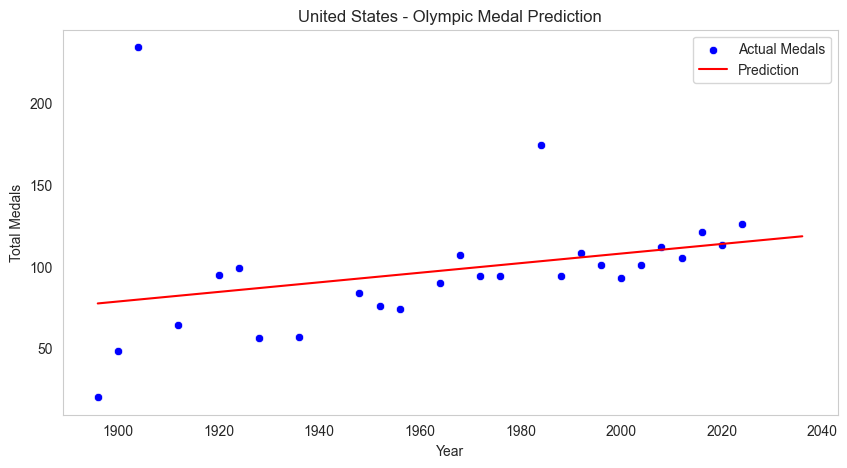

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_country, x="Year", y="Total", color="blue", label="Actual Medals")
sns.lineplot(x=np.append(X.values.flatten(), future_years.flatten()), 
                 y=np.append(model.predict(X), future_predictions), color="red", label="Prediction")

plt.title(f"{country} - Olympic Medal Prediction")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.legend()
plt.grid()
plt.show()

In [29]:
# Function to predict medals for a given NOC
def predict_medals(noc_code):
    # Filter data for the selected NOC
    df_country = df[df["NOC"] == noc_code][["Year", "Total"]].groupby("Year").sum().reset_index()

    # Check if data is available
    if df_country.empty:
        print(f"⚠️ No data available for {noc_code}. Try a different NOC.")
        return

    # Train the model
    X = df_country[["Year"]]
    y = df_country["Total"]
    model = LinearRegression()
    model.fit(X, y)

    # Predict future medals (2028, 2032, 2036)
    future_years = np.array([2028, 2032, 2036]).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    # Create a DataFrame for predictions
    predictions_df = pd.DataFrame({"Year": [2028, 2032, 2036], "Predicted_Medals": future_predictions.astype(int)})
    print(f"📊 Predicted Medals for {noc_code}:")
    print(predictions_df)

    # Plot Actual vs Predicted Medals
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df_country, x="Year", y="Total", color="blue", label="Actual Medals")
    sns.lineplot(x=np.append(X.values.flatten(), future_years.flatten()), 
                 y=np.append(model.predict(X), future_predictions), color="red", label="Prediction")

    plt.title(f"{noc_code} - Olympic Medal Prediction")
    plt.xlabel("Year")
    plt.ylabel("Total Medals")
    plt.legend()
    plt.grid()
    plt.show()


Enter NOC Code (e.g., USA, IND, CHN):  Japan


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


📊 Predicted Medals for Japan:
   Year  Predicted_Medals
0  2028                41
1  2032                43
2  2036                44


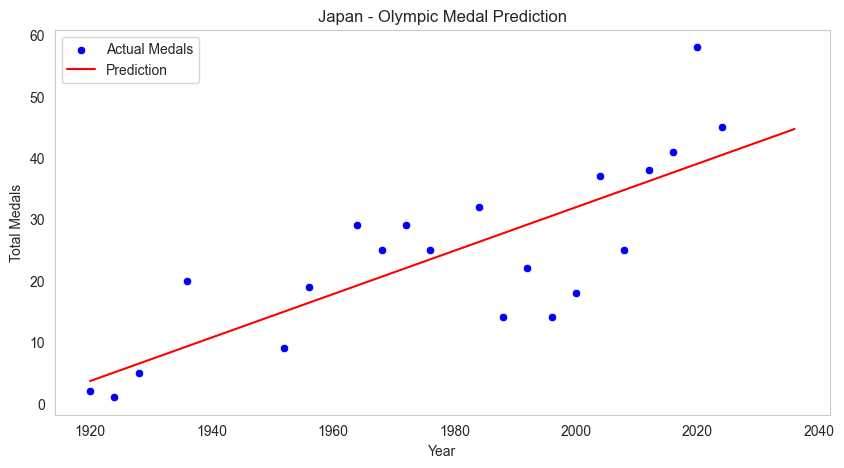

In [30]:
noc_input = input("Enter NOC Code (e.g., USA, IND, CHN): ").strip()
predict_medals(noc_input)